In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns
sns.set_theme()
sns.set_palette("vlag")

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from pycaret.datasets import get_data


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
journées = ['j1','j2','j3','j4','j5','j6','j7','j8','j9','j10','j11','j12','j13',
            'j14','j15','j16','j17','j18','j20','j21','j22','j23','j24',
            'j25','j26','j27','j28','j29','j30','j31','j32','j33','j34','j35','j36','j37','j38']

total_stat = pd.read_csv('../data/DataFrames/total_df', sep = ',')
total_stat = total_stat.drop(journées, axis = 1)
total_stat = total_stat.drop_duplicates(subset = 'Joueur')
total_stat.head()

,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,Var série,Var 1 an,But,Buts série,Buts 1 an,%Titu,%Titu série,%Titu 1 an,Temps,Tps série,Tps 1 an,Tps moy,Tps moy série,Tps moy 1 an,Min/But,Min/But 1 an,Min note/but,Prix/but,j19,Cleansheet,But/Peno,But/Coup-franc,But/surface,Pass decis.,Occas° créée,Corner gagné,%Passes,Ballons,Interceptions,Tacles,%Duel,Fautes,But évité,Action stoppée,DMI,Club,Prochain opposant,Date,Victoire probable,Championnat,Classement,pts,J.,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
0,Mbappé Kylian,A,49.0,111.0,6.12,4.50,6.37,17,1,35,1.31,0.00,1.49,13,0,32,0.88,0.00,0.94,1361,35,2960,80.06,35.0,84.57,105.0,93.0,5.0,3.77,4.5,7.5,2.0,0.0,2.0,2.0,12.0,32.0,0.8256,891.0,3.0,2.0,37.91,9.0,0.0,0.0,5.75,Paris SG,Reims,dim. 29/01 20:45,50.0,Ligue 1,1,47,19,15,2,2,48,14,34,62.0,1 - 1-5,4 - entre 6 et 8,5 - 80 et plus
1,Neymar,A,41.0,70.0,6.38,4.50,6.31,17,2,29,1.40,0.00,1.40,11,0,21,0.88,1.00,0.93,1325,180,2355,77.94,90.0,81.21,120.0,112.0,4.5,3.73,4.5,7.0,2.0,0.0,0.0,10.0,12.0,10.0,0.8212,1381.0,2.0,12.0,49.51,22.0,0.0,0.0,4.5,Paris SG,Reims,dim. 29/01 20:45,50.0,Ligue 1,1,47,19,15,2,2,48,14,34,29.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
2,Messi Lionel,A,40.0,76.0,7.03,6.00,6.68,15,2,31,1.25,1.41,1.30,8,1,13,1.00,1.00,0.97,1312,180,2689,87.47,90.0,86.74,164.0,207.0,6.5,5.00,5.0,9.0,0.0,1.0,2.0,10.0,15.0,21.0,0.8355,1240.0,0.0,11.0,51.52,3.0,0.0,0.0,5.5,Paris SG,Reims,dim. 29/01 20:45,50.0,Ligue 1,1,47,19,15,2,2,48,14,34,36.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
3,Hakimi Achraf,DL,21.0,28.0,5.38,4.50,5.44,17,1,32,1.19,0.00,1.01,3,0,4,0.76,0.00,0.81,1211,34,2365,71.24,34.0,73.91,404.0,591.0,6.0,7.00,4.5,7.0,0.0,0.0,1.0,1.0,4.0,6.0,0.8565,927.0,3.0,17.0,46.09,15.0,0.0,0.0,"5,00",Paris SG,Reims,dim. 29/01 20:45,50.0,Ligue 1,1,47,19,15,2,2,48,14,34,7.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
4,Ekitike Hugo,MO,13.0,13.0,5.04,5.67,5.17,13,6,21,1.09,1.37,1.14,3,3,6,0.46,0.83,0.52,505,372,943,38.85,62.0,44.90,168.0,157.0,6.0,4.33,4.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0,0.7718,239.0,4.0,4.0,39.29,7.0,0.0,0.0,"3,00",Paris SG,Reims,dim. 29/01 20:45,50.0,Ligue 1,1,47,19,15,2,2,48,14,34,0.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20


In [23]:
total_stat_pca = total_stat.drop('Date' ,axis = 1)
total_stat_pca['DMI'] = total_stat_pca['DMI'].str.replace(',', '.')
oh = ['Poste','Club','Prochain opposant','Championnat','Classement_range','Note_range','Enchère_moy_range']
total_stat_oneh = total_stat_pca[oh]
oneh = OneHotEncoder()

total_stat_oneh = oneh.fit_transform(total_stat_oneh)
encoded_total_stat = pd.DataFrame(total_stat_oneh.toarray(),columns=oneh.get_feature_names_out(oh), index=total_stat_pca.index)
total_stat_pca = total_stat_pca.drop(oh, axis = 1)
total_stat_pca_2 = total_stat_pca.merge( encoded_total_stat, left_index=True, right_index=True)

In [24]:
total_stat_pca_2 = total_stat_pca_2.set_index('Joueur')


Text(0.5, 1.0, 'PCA du Dataframe Stats')

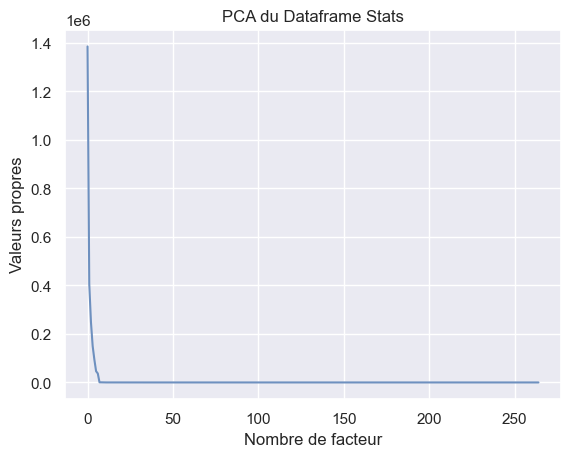

In [25]:
pca = PCA()
Coord = pca.fit_transform(total_stat_pca_2)

plt.plot(np.arange(0, 265), pca.explained_variance_)
plt.xlabel('Nombre de facteur')
plt.ylabel('Valeurs propres')
plt.title('PCA du Dataframe Stats')

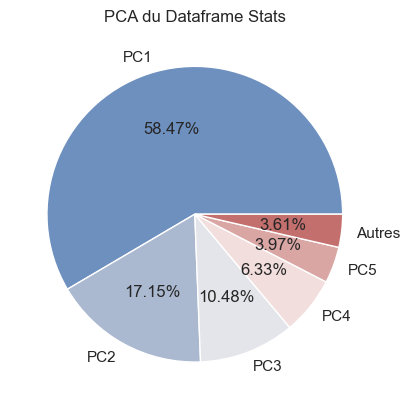

In [27]:
L1 = list(pca.explained_variance_ratio_[0:5])
L1.append(sum(pca.explained_variance_ratio_[5:265]))

plt.pie(L1, labels=['PC1','PC2','PC3','PC4','PC5','Autres'], 
        autopct='%1.2f%%')
plt.title('PCA du Dataframe Stats')
plt.show()

In [3]:
from pycaret.regression import *
exp = RegressionExperiment()
exp.setup(total_stat, target = 'j19', session_id = 123)

,Description,Value
0,Session id,123
1,Target,j19
2,Target type,Regression
3,Original data shape,"(2355, 64)"
4,Transformed data shape,"(2355, 523)"
5,Transformed train set shape,"(1648, 523)"
6,Transformed test set shape,"(707, 523)"
7,Numeric features,53
8,Categorical features,10
9,Preprocess,True


In [4]:
best_model = exp.compare_models(exclude = 'lar')
print(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3764,0.3784,0.6116,0.4252,0.1000,0.0763,1.0360
rf,Random Forest Regressor,0.3851,0.3843,0.6156,0.4199,0.1011,0.0780,1.0350
gbr,Gradient Boosting Regressor,0.4236,0.4021,0.6294,0.3933,0.1040,0.0862,1.0460
br,Bayesian Ridge,0.4423,0.4272,0.6482,0.3571,0.1064,0.0901,0.9940
ridge,Ridge Regression,0.4479,0.4276,0.6486,0.3555,0.1065,0.0912,0.9970
omp,Orthogonal Matching Pursuit,0.4467,0.4286,0.6495,0.3537,0.1066,0.0909,1.0080
lr,Linear Regression,0.4752,0.4620,0.6751,0.3014,0.1107,0.0965,1.6890
ada,AdaBoost Regressor,0.4858,0.4614,0.6751,0.3013,0.1114,0.0993,1.0150
en,Elastic Net,0.5434,0.6062,0.7730,0.0890,0.1277,0.1120,1.0090
lasso,Lasso Regression,0.5474,0.6110,0.7761,0.0820,0.1282,0.1128,1.0450


ExtraTreesRegressor(n_jobs=-1, random_state=123)


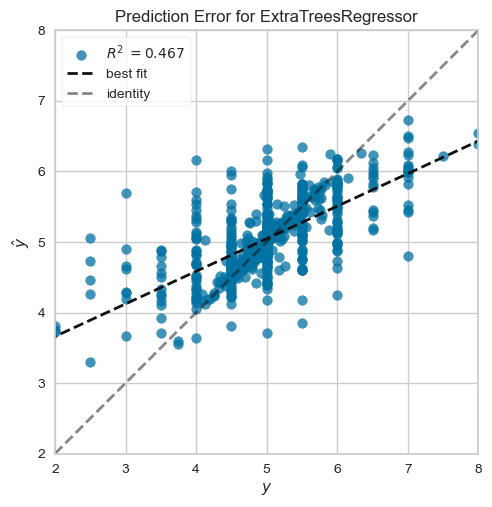

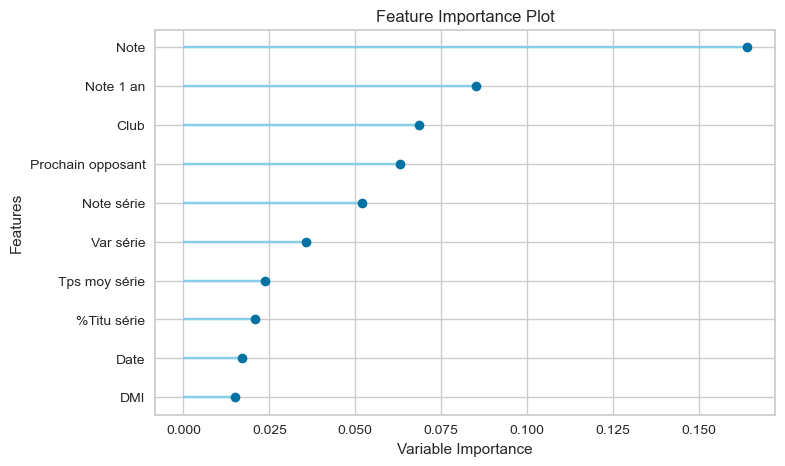

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3385,0.3070,0.5540,0.4665,0.0991,0.0747


,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,...,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range,j19,prediction_label
2355,Espino Alfonso,DL,10.0,12.0,4.53,4.53,4.76,18,18,37,...,8,12,29,-17,2.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,5.00,4.3901
979,Zappacosta Davide,DL,1.0,2.0,4.90,0.00,4.85,5,0,20,...,4,37,23,14,1.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,4.90,4.9567
449,Jubal,DC,11.0,14.0,4.66,4.66,5.06,19,19,36,...,12,16,41,-25,3.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,5.00,4.4539
343,Achi Mohamed,MD,1.0,1.0,5.00,0.00,5.00,2,0,3,...,6,21,24,-3,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.00,4.9941
2177,Seoane Jaime,MD,8.0,8.0,4.95,5.50,4.95,11,1,11,...,9,16,25,-9,0.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.95,5.1004
997,Bellanova Raoul,DL,10.0,10.0,5.06,0.00,4.88,9,0,25,...,5,38,24,14,0.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20,5.06,5.0741
1023,Sala Jacopo,DL,1.0,1.0,4.67,0.00,4.68,6,0,11,...,9,17,30,-13,0.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.67,4.6919
1675,Mateta Jean-Philippe,A,6.0,6.0,4.59,4.38,4.80,16,4,35,...,8,18,27,-9,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.50,4.5277
501,Oukidja Alexandre,G,15.0,17.0,5.20,5.40,5.18,15,10,19,...,6,31,22,9,2.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20,6.00,5.8390
1457,Romero Cristian,DC,8.0,10.0,4.54,0.00,4.93,12,0,27,...,7,39,31,8,2.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,5.50,5.0858


In [5]:
exp.plot_model(best_model, plot = 'error')
exp.plot_model(best_model, plot = 'feature')
exp.predict_model(best_model).head(10)

### GARDIENS

In [6]:
G_total_stat = total_stat[(total_stat['Poste'] == 'G')]
G_total_stat =G_total_stat.drop(['Min/But', 'Min note/but', '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 
           'Pass decis.', 'Occas° créée', 'Min/But 1 an', 'But/surface', 'But/Coup-franc','But/Peno', 
           'Corner gagné'], axis = 1)
G_total_stat.head()

,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,...,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
11,Donnarumma Gianluigi,G,17.0,22.0,5.79,5.79,5.70,19,19,28,...,15,2,2,48,14,34,5.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
34,Chevalier Lucas,G,15.0,17.0,5.50,5.50,5.42,13,13,31,...,10,4,5,35,25,10,2.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20
42,Léo Jardim,G,7.0,8.0,4.17,0.00,5.21,6,0,21,...,10,4,5,35,25,10,1.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20
52,Mvogo Yvon,G,7.0,15.0,5.43,0.00,5.43,14,0,14,...,9,5,5,31,29,2,8.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20
54,Mannone Vito,G,15.0,15.0,5.25,5.25,5.25,6,6,6,...,9,5,5,31,29,2,0.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20


In [7]:
G_exp = RegressionExperiment()
G_exp.setup(G_total_stat, target = 'j19', session_id = 124)

,Description,Value
0,Session id,124
1,Target,j19
2,Target type,Regression
3,Original data shape,"(159, 49)"
4,Transformed data shape,"(159, 519)"
5,Transformed train set shape,"(111, 519)"
6,Transformed test set shape,"(48, 519)"
7,Ordinal features,1
8,Numeric features,38
9,Categorical features,10


In [8]:
G_best_model = G_exp.compare_models(exclude = 'lar')
print(G_best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.6260,0.8053,0.8487,0.0718,0.1462,0.1355,1.1940
ada,AdaBoost Regressor,0.6861,0.8818,0.8909,0.0101,0.1533,0.1476,1.1400
et,Extra Trees Regressor,0.6523,0.8910,0.9038,-0.0520,0.1565,0.1419,1.1920
br,Bayesian Ridge,0.7929,1.0855,0.9742,-0.0656,0.1692,0.1772,1.0700
gbr,Gradient Boosting Regressor,0.6874,0.9018,0.9045,-0.0805,0.1566,0.1462,1.1520
en,Elastic Net,0.7915,1.0864,0.9773,-0.0929,0.1693,0.1750,1.0440
lasso,Lasso Regression,0.7961,1.1077,0.9833,-0.0941,0.1704,0.1765,1.0580
llar,Lasso Least Angle Regression,0.7961,1.1077,0.9833,-0.0941,0.1704,0.1765,1.0650
dummy,Dummy Regressor,0.8204,1.1405,1.0010,-0.1047,0.1736,0.1842,1.0830
knn,K Neighbors Regressor,0.8405,1.2156,1.0314,-0.1792,0.1783,0.1880,1.0830


RandomForestRegressor(n_jobs=-1, random_state=124)


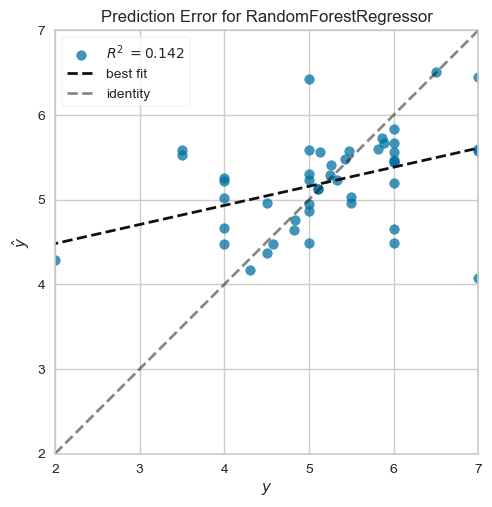

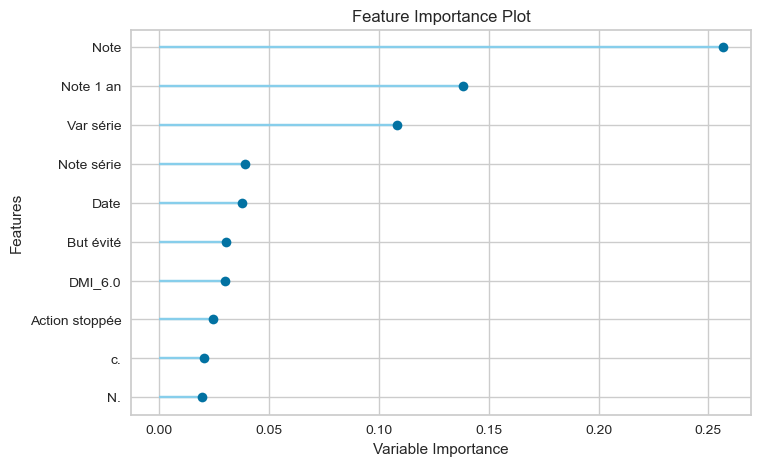

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.6327,0.8579,0.9262,0.1419,0.1639,0.1407


,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,...,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range,j19,prediction_label
79,Riou Rémy,G,7.0,7.0,5.25,0.00,5.50,4,0,18,...,8,28,23,5,0.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,5.25,5.2921
1184,Szczesny Wojciech,G,17.0,24.0,5.58,5.40,5.65,13,5,30,...,3,30,15,15,7.0,2 - 5-10,3 - entre 4 et 6,2 - entre 20 et 40,4.00,4.6630
2270,Pacheco Fernando,G,7.0,8.0,6.00,0.00,4.94,1,0,18,...,9,18,26,-8,1.0,3 - 10-15,4 - entre 6 et 8,1 - moins de 20,6.00,5.4395
2081,Oblak Jan,G,16.0,21.0,5.28,5.13,5.25,16,8,36,...,5,27,16,11,5.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40,5.00,5.5857
648,Sauvage Alexis,G,13.0,16.0,4.75,4.00,4.75,16,4,16,...,10,25,31,-6,3.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,6.00,4.4898
241,Omlin Jonas,G,15.0,15.0,5.29,4.90,5.21,14,5,29,...,12,28,40,-12,0.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.00,4.4725
1235,Consigli Andrea,G,14.0,17.0,4.82,0.00,4.99,17,0,35,...,10,18,29,-11,3.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.82,4.6427
1874,Pickford Jordan,G,17.0,19.0,5.37,5.04,5.33,19,13,38,...,11,15,28,-13,2.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,3.50,5.5827
762,Filipovic Ivan,G,10.0,13.0,5.11,0.00,5.20,14,0,15,...,6,17,19,-2,3.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,5.11,5.1243
615,Callens Thomas,G,7.0,8.0,7.00,0.00,7.00,2,0,2,...,7,18,17,1,1.0,3 - 10-15,4 - entre 6 et 8,1 - moins de 20,7.00,6.4426


In [9]:
G_exp.plot_model(G_best_model, plot = 'error')
G_exp.plot_model(G_best_model, plot = 'feature')
G_exp.predict_model(G_best_model).head(10)

### DEFENSEURS

In [10]:
D_total_stat = total_stat[(total_stat['Poste'] == 'DC')|(total_stat['Poste'] == 'DL')]
D_total_stat = D_total_stat.drop(['But évité', 'Action stoppée'], axis = 1)
D_total_stat.head()

,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,...,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
3,Hakimi Achraf,DL,21.0,28.0,5.38,4.50,5.44,17,1,32,...,15,2,2,48,14,34,7.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
5,Marquinhos,DC,28.0,33.0,5.69,5.13,5.58,18,4,37,...,15,2,2,48,14,34,5.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
9,Nuno Mendes,DL,13.0,17.0,5.50,0.00,5.23,12,0,30,...,15,2,2,48,14,34,4.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
10,Bernat Juan,DL,10.0,13.0,5.42,5.25,5.31,13,2,21,...,15,2,2,48,14,34,3.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
15,Ramos Sergio,DC,12.0,16.0,5.26,5.14,5.34,17,7,28,...,15,2,2,48,14,34,4.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20


In [11]:
D_exp = RegressionExperiment()
D_exp.setup(D_total_stat, target = 'j19', session_id = 124)

,Description,Value
0,Session id,124
1,Target,j19
2,Target type,Regression
3,Original data shape,"(836, 62)"
4,Transformed data shape,"(836, 512)"
5,Transformed train set shape,"(585, 512)"
6,Transformed test set shape,"(251, 512)"
7,Ordinal features,2
8,Numeric features,51
9,Categorical features,10


In [12]:
D_best_model = D_exp.compare_models(exclude = 'lar')
print(D_best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.3529,0.3182,0.5510,0.4377,0.0975,0.0772,1.5440
et,Extra Trees Regressor,0.3478,0.3234,0.5572,0.4226,0.0985,0.0760,1.4350
gbr,Gradient Boosting Regressor,0.3793,0.3279,0.5625,0.4068,0.0997,0.0829,1.3380
ridge,Ridge Regression,0.4254,0.3741,0.6028,0.3028,0.1055,0.0914,1.1520
ada,AdaBoost Regressor,0.4553,0.3855,0.6106,0.2925,0.1071,0.0970,1.3850
omp,Orthogonal Matching Pursuit,0.4292,0.3794,0.6073,0.2920,0.1062,0.0921,1.1440
br,Bayesian Ridge,0.4538,0.4329,0.6429,0.2347,0.1126,0.0989,1.2410
lr,Linear Regression,0.4561,0.4050,0.6292,0.2161,0.1099,0.0975,1.1290
en,Elastic Net,0.4926,0.5122,0.7008,0.0902,0.1230,0.1081,1.1380
lasso,Lasso Regression,0.4922,0.5149,0.7024,0.0865,0.1233,0.1082,1.1160


RandomForestRegressor(n_jobs=-1, random_state=124)


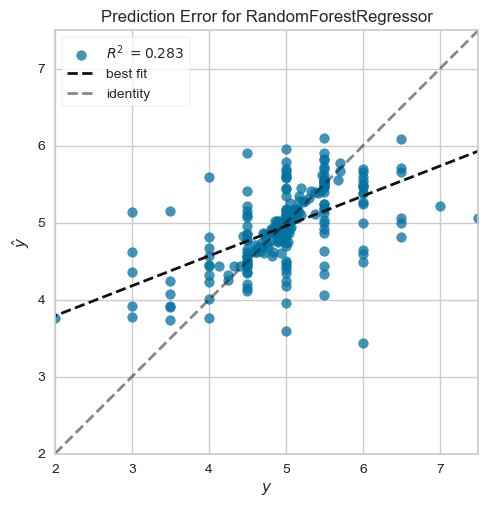

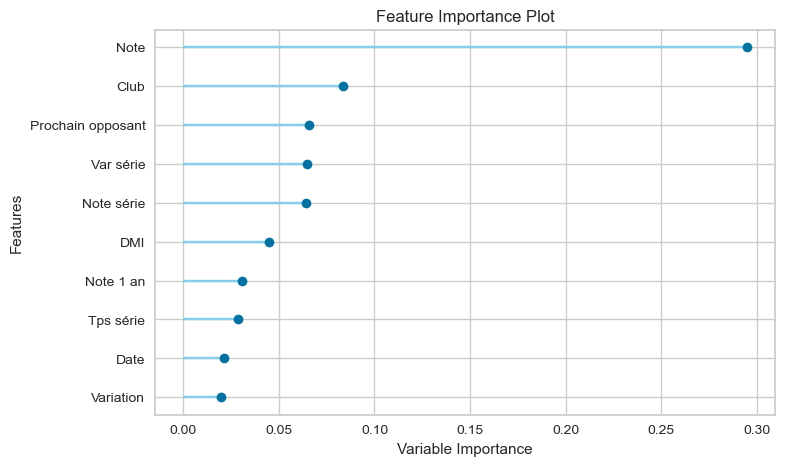

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.3403,0.3265,0.5714,0.2832,0.1003,0.0722


,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,...,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range,j19,prediction_label
2045,Abner,DC,7.0,8.0,4.50,4.50,4.50,1,1,1,...,5,19,14,5,1.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,4.50,4.5580
1325,Martínez Lucas,DC,13.0,15.0,5.50,0.00,5.07,14,0,21,...,8,21,25,-4,2.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.50,5.5290
2185,Angileri Fabrizio,DL,1.0,2.0,4.00,0.00,4.00,8,0,8,...,9,16,25,-9,1.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.00,4.2280
871,Jonathan Buatu,DC,12.0,14.0,5.13,5.13,5.13,12,12,12,...,6,17,18,-1,2.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.50,5.1519
1570,Wan-Bissaka Aaron,DL,1.0,2.0,5.29,5.40,4.89,7,5,14,...,5,32,25,7,1.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20,5.50,5.6226
564,Abdi Ali,DL,10.0,12.0,5.21,4.88,5.10,14,8,30,...,5,23,20,3,2.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,4.50,5.2199
1064,Lykogiannis Charalampos,DL,11.0,12.0,4.93,0.00,4.81,15,0,24,...,8,23,29,-6,1.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.93,4.8504
334,Zeze Nathan,DC,1.0,1.0,5.50,5.50,5.50,1,1,1,...,6,21,24,-3,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.50,6.0979
1727,Bella-Kotchap Armel,DC,10.0,12.0,4.96,0.00,4.96,13,0,13,...,13,17,35,-18,2.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,5.00,4.9365
247,Estève Maxime,DC,12.0,12.0,4.90,0.00,4.90,15,0,26,...,12,28,40,-12,0.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.90,4.7448


In [13]:
D_exp.plot_model(D_best_model, plot = 'error')
D_exp.plot_model(D_best_model, plot = 'feature')
D_exp.predict_model(D_best_model).head(10)

### MILIEUX

In [14]:
M_total_stat = total_stat[(total_stat['Poste'] == 'MO')|(total_stat['Poste'] == 'MD')]
M_total_stat = M_total_stat.drop(['But évité', 'Action stoppée'], axis = 1)
M_total_stat.head()

,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,...,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
4,Ekitike Hugo,MO,13.0,13.0,5.04,5.67,5.17,13,6,21,...,15,2,2,48,14,34,0.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
6,Soler Carlos,MO,13.0,15.0,5.45,5.50,5.52,11,10,30,...,15,2,2,48,14,34,2.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
7,Renato Sanches,MO,12.0,13.0,5.18,4.50,5.12,11,1,25,...,15,2,2,48,14,34,1.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
8,Danilo Pereira,MD,13.0,14.0,5.61,5.17,5.91,14,3,29,...,15,2,2,48,14,34,1.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
12,Verratti Marco,MD,22.0,29.0,5.78,0.00,6.05,16,0,31,...,15,2,2,48,14,34,7.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40


In [15]:
M_exp = RegressionExperiment()
M_exp.setup(M_total_stat, target = 'j19', session_id = 124)

,Description,Value
0,Session id,124
1,Target,j19
2,Target type,Regression
3,Original data shape,"(900, 62)"
4,Transformed data shape,"(900, 515)"
5,Transformed train set shape,"(630, 515)"
6,Transformed test set shape,"(270, 515)"
7,Ordinal features,1
8,Numeric features,51
9,Categorical features,10


In [16]:
M_best_model = M_exp.compare_models(exclude = 'lar')
print(M_best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3826,0.4002,0.6295,0.2806,0.1009,0.0758,1.7330
rf,Random Forest Regressor,0.3987,0.4141,0.6406,0.2492,0.1024,0.0788,1.7420
gbr,Gradient Boosting Regressor,0.4244,0.4348,0.6551,0.2127,0.1041,0.0837,1.3870
ada,AdaBoost Regressor,0.4655,0.4649,0.6774,0.1578,0.1083,0.0924,1.5020
ridge,Ridge Regression,0.4562,0.4828,0.6895,0.1473,0.1100,0.0900,1.1840
omp,Orthogonal Matching Pursuit,0.4550,0.4846,0.6908,0.1445,0.1103,0.0898,1.1920
en,Elastic Net,0.4740,0.5197,0.7154,0.0808,0.1153,0.0947,1.1990
lasso,Lasso Regression,0.4777,0.5233,0.7178,0.0752,0.1157,0.0954,1.1720
llar,Lasso Least Angle Regression,0.4777,0.5233,0.7178,0.0752,0.1157,0.0954,1.1920
br,Bayesian Ridge,0.4783,0.5235,0.7180,0.0745,0.1158,0.0956,1.2830


ExtraTreesRegressor(n_jobs=-1, random_state=124)


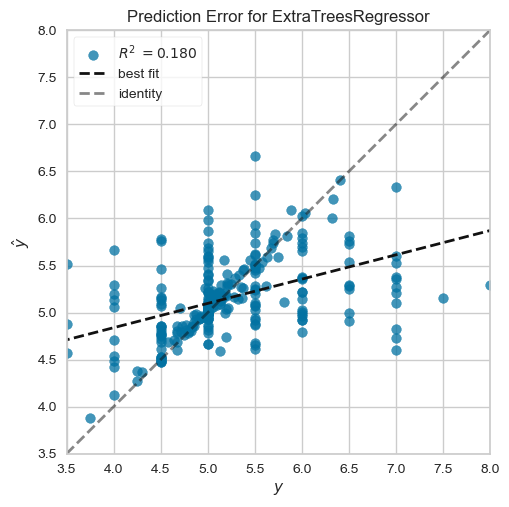

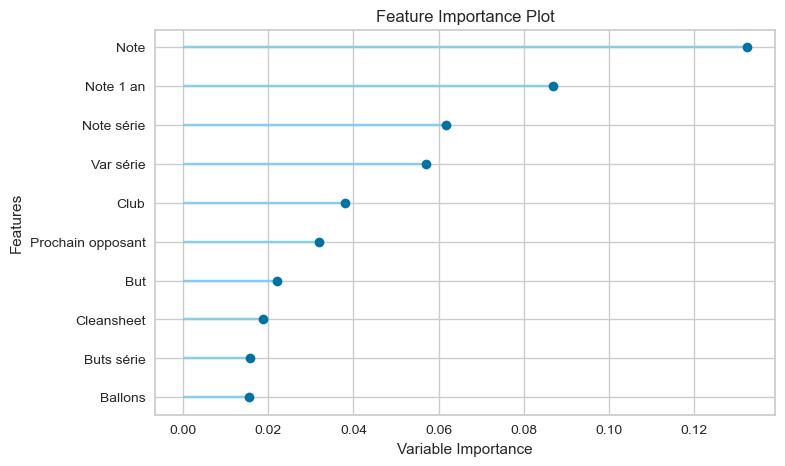

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3880,0.4140,0.6434,0.1799,0.0992,0.0718


,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,...,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range,j19,prediction_label
1516,Roca Marc,MD,12.0,14.0,5.03,5.03,5.03,19,19,19,...,9,26,33,-7,2.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,5.00,4.6688
1034,Tonali Sandro,MD,22.0,29.0,5.67,0.00,5.80,15,0,32,...,2,35,20,15,7.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40,5.67,5.6894
94,Diatta Krépin,MO,11.0,12.0,5.50,6.50,5.50,16,3,16,...,4,42,26,16,1.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20,8.00,5.2886
2050,Moi Gómez,MO,15.0,19.0,5.81,5.81,5.53,18,18,31,...,6,18,17,1,4.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,5.81,5.1143
196,Agoumé Lucien,MD,1.0,2.0,5.33,0.00,5.18,3,0,17,...,9,30,40,-10,1.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.33,5.3944
1228,Lopez Maxime,MO,19.0,21.0,5.21,0.00,5.35,14,0,31,...,10,18,29,-11,2.0,4 - 15-20,3 - entre 4 et 6,2 - entre 20 et 40,5.21,5.4071
92,Golovin Aleksandr,MO,20.0,26.0,5.97,5.97,5.80,18,18,32,...,4,42,26,16,6.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40,6.00,6.0280
1201,Hjulmand Morten,MO,17.0,19.0,5.56,5.25,5.56,17,2,17,...,7,18,22,-4,2.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.50,5.2618
1840,Kouyaté Cheikhou,MD,12.0,12.0,5.08,0.00,5.21,12,0,24,...,9,16,35,-19,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.08,5.1762
1464,Dasilva Josh,MO,12.0,15.0,5.38,5.38,5.17,20,20,29,...,4,32,28,4,3.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,5.00,5.3301


In [17]:
M_exp.plot_model(M_best_model, plot = 'error')
M_exp.plot_model(M_best_model, plot = 'feature')
M_exp.predict_model(M_best_model).head(10)

### ATTAQUANTS

In [18]:
A_total_stat = total_stat[(total_stat['Poste'] == 'A')]
A_total_stat = A_total_stat.drop(['But évité', 'Action stoppée'], axis = 1)
A_total_stat.head()

,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,...,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
0,Mbappé Kylian,A,49.0,111.0,6.12,4.50,6.37,17,1,35,...,15,2,2,48,14,34,62.0,1 - 1-5,4 - entre 6 et 8,5 - 80 et plus
1,Neymar,A,41.0,70.0,6.38,4.50,6.31,17,2,29,...,15,2,2,48,14,34,29.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
2,Messi Lionel,A,40.0,76.0,7.03,6.00,6.68,15,2,31,...,15,2,2,48,14,34,36.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
21,David Jonathan,A,38.0,63.0,5.89,5.89,5.30,19,19,38,...,10,4,5,35,25,10,25.0,2 - 5-10,3 - entre 4 et 6,4 - entre 60 et 80
24,Bayo Mohamed,A,17.0,20.0,4.83,6.00,4.93,12,2,27,...,10,4,5,35,25,10,3.0,2 - 5-10,3 - entre 4 et 6,2 - entre 20 et 40


In [19]:
A_exp = RegressionExperiment()
A_exp.setup(A_total_stat, target = 'j19', session_id = 124)

,Description,Value
0,Session id,124
1,Target,j19
2,Target type,Regression
3,Original data shape,"(460, 62)"
4,Transformed data shape,"(460, 516)"
5,Transformed train set shape,"(322, 516)"
6,Transformed test set shape,"(138, 516)"
7,Numeric features,51
8,Categorical features,10
9,Preprocess,True


In [20]:
A_best_model = A_exp.compare_models(exclude = 'lar')
print(A_best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4792,0.5596,0.7316,0.2319,0.1200,0.1000,1.3710
et,Extra Trees Regressor,0.4690,0.5688,0.7440,0.2091,0.1217,0.0970,1.4470
ada,AdaBoost Regressor,0.5288,0.5753,0.7499,0.1946,0.1235,0.1097,1.3610
rf,Random Forest Regressor,0.4802,0.5905,0.7558,0.1867,0.1242,0.0999,1.4570
ridge,Ridge Regression,0.5532,0.6329,0.7792,0.1200,0.1294,0.1152,1.2190
en,Elastic Net,0.5578,0.6488,0.7952,0.1016,0.1305,0.1156,1.2140
omp,Orthogonal Matching Pursuit,0.5590,0.6522,0.7886,0.0985,0.1314,0.1166,1.2250
br,Bayesian Ridge,0.5669,0.6588,0.7994,0.0976,0.1312,0.1176,1.2710
lasso,Lasso Regression,0.5664,0.6613,0.8010,0.0933,0.1315,0.1174,1.2200
llar,Lasso Least Angle Regression,0.5664,0.6613,0.8010,0.0933,0.1315,0.1174,1.2130


GradientBoostingRegressor(random_state=124)


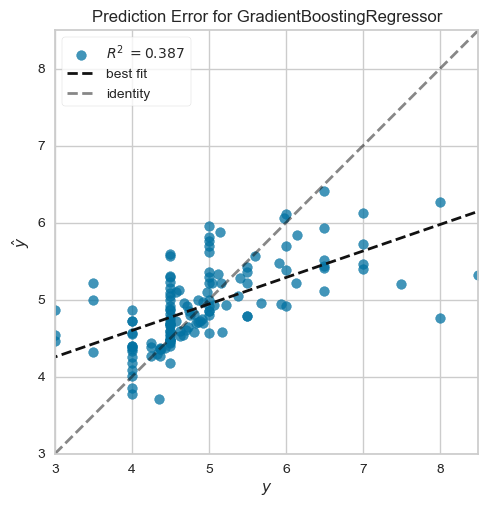

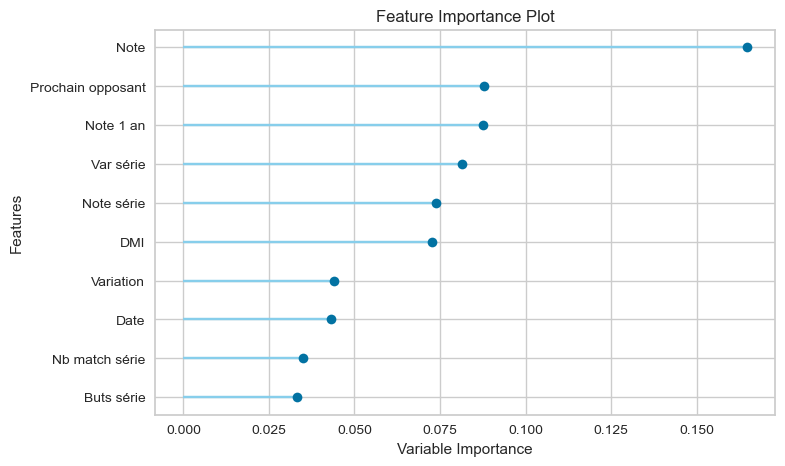

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.4867,0.5578,0.7468,0.3868,0.1183,0.0977


,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,...,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range,j19,prediction_label
2247,Morales José,A,21.0,29.0,4.68,4.75,5.19,17,4,34,...,5,21,13,8,8.0,2 - 5-10,3 - entre 4 et 6,2 - entre 20 et 40,4.68,4.962609
956,Lookman Ademola,A,22.0,40.0,5.94,8.00,5.51,18,2,34,...,4,37,23,14,18.0,2 - 5-10,3 - entre 4 et 6,3 - entre 40 et 60,8.00,6.262777
941,Simeone Giovanni,A,19.0,23.0,4.80,4.50,4.60,10,1,26,...,1,46,14,32,4.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40,4.50,4.996022
662,Luvambo Taylor,A,7.0,7.0,5.40,0.00,5.40,5,0,5,...,7,24,27,-3,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.40,5.287394
1771,Broja Armando,A,1.0,2.0,4.63,0.00,4.60,12,0,31,...,7,22,21,1,1.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.63,4.524281
1763,Sterling Raheem,A,31.0,48.0,5.10,0.00,5.53,15,0,30,...,7,22,21,1,17.0,3 - 10-15,3 - entre 4 et 6,3 - entre 40 et 60,4.50,4.762995
1842,Surridge Sam,A,6.0,6.0,4.54,4.71,4.54,13,7,13,...,9,16,35,-19,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.50,4.689408
1933,Vinícius Júnior,A,43.0,84.0,5.94,5.94,5.94,17,17,33,...,2,38,16,22,41.0,1 - 1-5,3 - entre 4 et 6,5 - 80 et plus,5.94,4.942593
370,Hunou Adrien,A,13.0,17.0,5.06,5.03,5.06,18,15,18,...,15,17,41,-24,4.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.50,4.876103
2111,Bebé,A,4.0,4.0,4.50,0.00,4.74,4,0,19,...,6,24,22,2,0.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,4.50,4.525107


In [21]:
A_exp.plot_model(A_best_model, plot = 'error')
A_exp.plot_model(A_best_model, plot = 'feature')
A_exp.predict_model(A_best_model).head(10)